In [1]:
!pip install osmnx >> log.txt
!pip install matplotlib >> log.txt
!pip install numpy >> log.txt
!pip install optalgotools >> log.txt
!pip install folium >> log.txt
!pip install tqdm >> log.txt
!pip install geopy >> log.txt

In [2]:
import osmnx as ox
import matplotlib.pyplot as plt


30.27263125 120.10764837409579


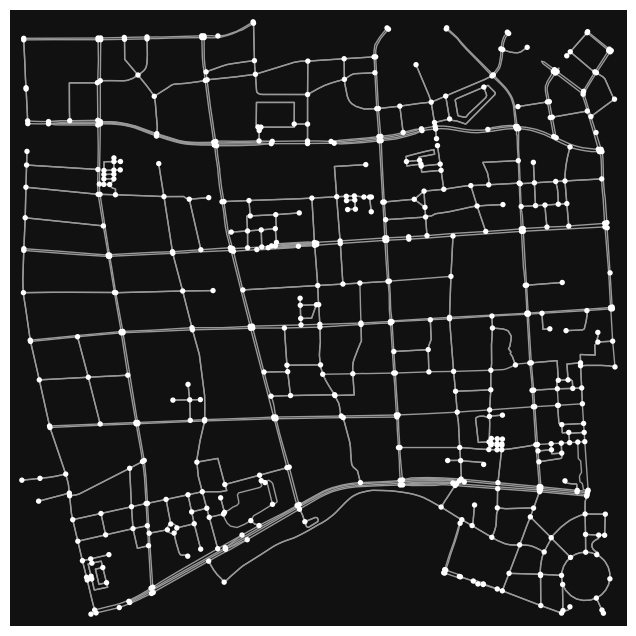

In [3]:
road1 = "古荡路"
road2 = "余杭塘路"
place_name1 = "Gudang, Hangzhou, China"
place_name2 = road1 + " & " + road2
latitude, longitude = ox.geocode(place_name2)
print(latitude, longitude)
GuDang = (30.284698, 120.109238)

# find by coordinate
graph = ox.graph_from_point(GuDang, network_type='drive', dist=2100)

fig, ax = ox.plot_graph(graph)


In [4]:
import numpy as np

nodes, edges = ox.graph_to_gdfs(graph)

# Filter nodes that have the 'highway' attribute set to 'traffic_signals'
traffic_lights = nodes

30.295046, 120.097944
30.300075, 120.097855
road1 = "文一路"
road2 = "文一路隧道"
place_name1 = "Gudang, Hangzhou, China"
place_name2 = road1 + " & " + road2
latitude, longitude = ox.geocode(place_name2)
print(latitude, longitude)
x, y = latitude, longitude


# print(traffic_lights.filter(['y', 'x']==['30.281835', '120.109041']))
target_node = traffic_lights[(abs(traffic_lights['x'] - y) < 0.01) & (abs(traffic_lights['y'] - x) < 0.005)]

# traffic_lights['distance'] = np.sqrt((traffic_lights['x'] - x) ** 2 + (traffic_lights['y'] - y) ** 2)

# Sort the nodes by distance and get the closest node(s)
# closest_nodes = traffic_lights.sort_values(by='distance').head(1)  # You can change '1' to get more than one closest node
# closest_nodes
# osmid_of_target_node = target_node['id'].values[0]
target_node
# edges
# print(traffic_lights['geometry'])
# graph

30.2903266 120.1271457


,y,x,highway,street_count,geometry
osmid,,,,,
26197727,30.290408,120.124187,traffic_signals,4,POINT (120.12419 30.29041)
26197728,30.290807,120.130477,traffic_signals,4,POINT (120.13048 30.29081)
33992585,30.287395,120.119021,NaN,3,POINT (120.11902 30.28740)
33993027,30.294738,120.123968,NaN,3,POINT (120.12397 30.29474)
33993038,30.293312,120.124031,NaN,4,POINT (120.12403 30.29331)
33993190,30.293206,120.121794,NaN,3,POINT (120.12179 30.29321)
262910009,30.289955,120.119172,traffic_signals,3,POINT (120.11917 30.28996)
262910010,30.290253,120.124201,traffic_signals,4,POINT (120.12420 30.29025)
262910011,30.290477,120.130493,traffic_signals,4,POINT (120.13049 30.29048)


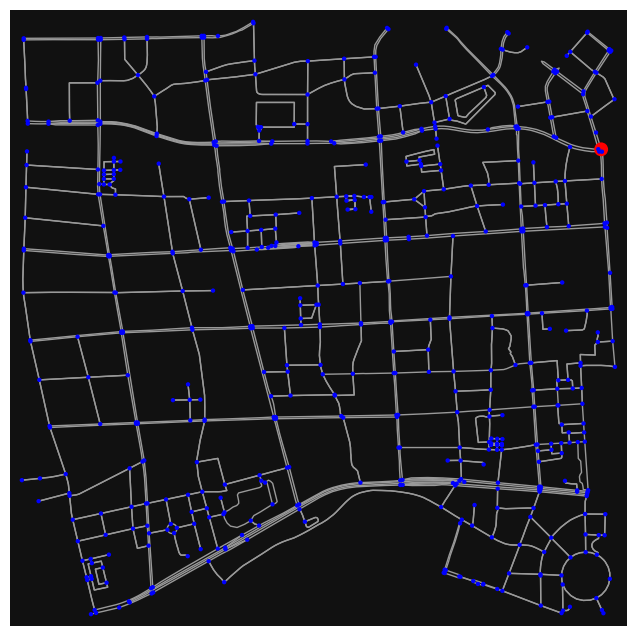

In [5]:
# Suppose the node IDs of the two nodes you want to highlight are 1234567890 and 9876543210
# node1_id = 26197709 # 30.284443	120.114585         2, 3
# node1_id = 3382408994 # 30.278606	120.115016      1,3
# node1_id = 26496837 # 30.278366	120.106039     1,2
# node1_id = 26607405  # 30.284117	120.10446     2,2
# node1_id =  332556593 # 30.283895	120.094802   2,1
# node1_id = 332556598 # 30.288751	120.093849   3,1
# node1_id =  33720424 # 30.289040	120.102869      3,2
# node1_id = 262910008  # 30.289688	120.114313      3,3
# node1_id = 2908449017 # 30.296996	120.093084     4, 1
# node1_id = 27127956 # 30.278049	120.096021     1, 1
# node1_id = 26197702 # 30.279129	120.125075     1， 4
# node1_id = 31885920 # 30.296754	120.123847         4， 4
# node1_id = 26197716 # 30.284997	120.124611       2, 4
node1_id = 2908446453
# print(graph[332556593][332556596])
# for node1_id in target_node:
    # print(node1_id)
    # Create a list of node colors: default color for most nodes and a special color for the highlighted nodes
nc = ['r' if node == node1_id else 'b' for node in graph.nodes()]

# Create a list of node sizes: larger size for the highlighted nodes and default size for the rest
ns = [100 if node == node1_id else 10 for node in graph.nodes()]

# Plot the graph with the specified node colors and sizes
fig, ax = ox.plot_graph(graph, node_color=nc, node_size=ns)


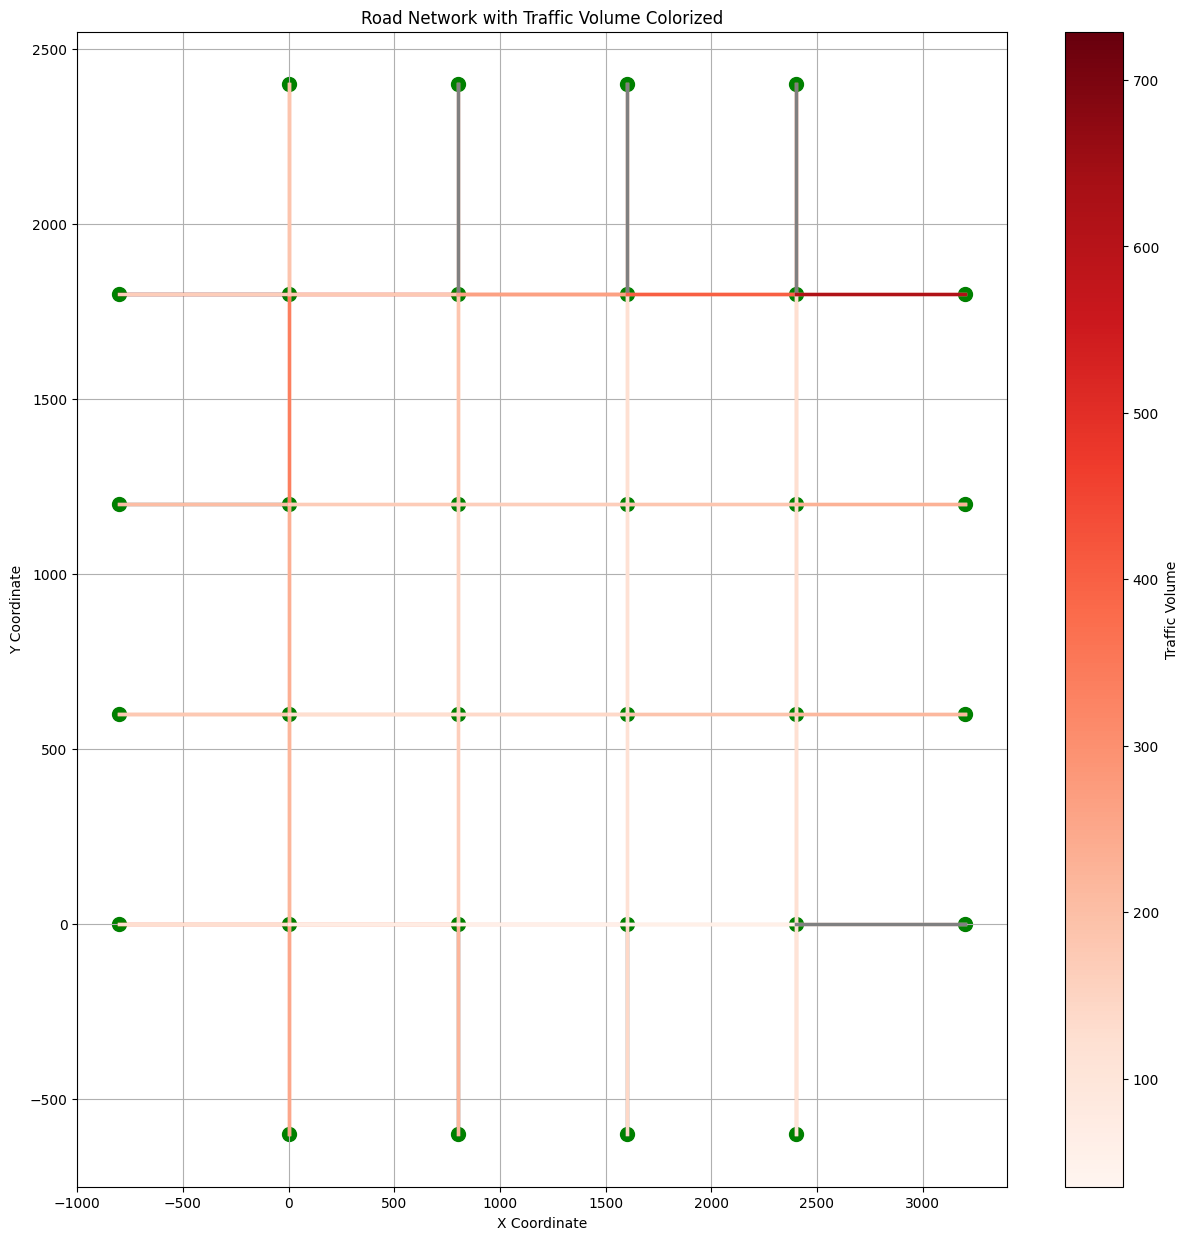

In [6]:
import json
import matplotlib.pyplot as plt
import argparse


with open("./hangzhou_4x4_gudang_18041610_1h/roadnet_4X4.json", 'r') as road_file:
    road_data = json.load(road_file)

# Load the newly uploaded data
with open("./hangzhou_4x4_gudang_18041610_1h/hangzhou_4x4_gudang_18041610_1h.json", "r") as file:
    new_volume_data = json.load(file)
    
# with open("../data/Jinan/3_4/roadnet_3_4.json", 'r') as road_file:
#     road_data = json.load(road_file)

# # Load the newly uploaded data
# with open("../data/Jinan/3_4/anon_3_4_jinan_real.json", "r") as file:
#     new_volume_data = json.load(file)
    
# Calculate the traffic volume on each road segment

# Initialize a dictionary to store the traffic volume for each road segment
traffic_volume = {}

# Loop through each vehicle's route to compute the traffic volume
for entry in new_volume_data:
    route = entry["route"]
    for road_segment in route:
        if road_segment not in traffic_volume:
            traffic_volume[road_segment] = 0
        traffic_volume[road_segment] += 1

# Visualize the (3|4)x4 road map with roads colorized based on traffic volume

fig, ax = plt.subplots(figsize=(15, 15))

# Set a colormap for traffic volume
norm = plt.Normalize(min(traffic_volume.values()), max(traffic_volume.values()))
cmap = plt.get_cmap("Reds")

# Draw roads
for road in road_data["roads"]:
    start_point = road["points"][0]
    end_point = road["points"][1]
    road_id = road["id"]
    if road_id in traffic_volume:
        color = cmap(norm(traffic_volume[road_id]))
    else:
        color = "gray"  # Default color for roads with no traffic data
    plt.plot([start_point["x"], end_point["x"]], [start_point["y"], end_point["y"]], color=color, linewidth=2.5)

# Draw intersections
for intersection in road_data["intersections"]:
    plt.scatter(intersection["point"]["x"], intersection["point"]["y"], s=100, c='g', marker='o')

# Add colorbar to indicate traffic volume
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label="Traffic Volume")

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Road Network with Traffic Volume Colorized')
plt.grid(True)
plt.show()


Execution time: 0.002844095230102539 seconds


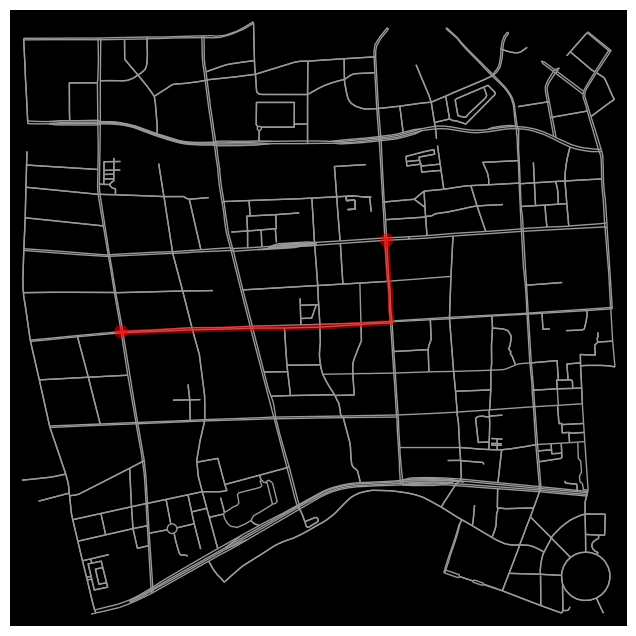

In [7]:
import networkx as nx

# Specify the start and end nodes
start_node = 332556593
end_node = 262910008

import time

start_time = time.time()

# Generate a BFS tree from the start node
bfs_tree = nx.bfs_tree(graph, source=start_node)

# Traverse the BFS tree to get the route from the start node to the end node
bfs_route = [end_node]
while bfs_route[-1] != start_node:
    bfs_route.append(list(bfs_tree.predecessors(bfs_route[-1]))[0])
bfs_route = bfs_route[::-1]  # reverse the route to start from the start node

end_time = time.time()

print(f"Execution time: {end_time - start_time} seconds")

# Plot the route
fig, ax = ox.plot_graph_route(graph, bfs_route, route_linewidth=4, node_size=0, bgcolor='k')

from optalgotools import routing

routing.draw_route(graph, bfs_route)



Execution time: 0.0001480579376220703 seconds


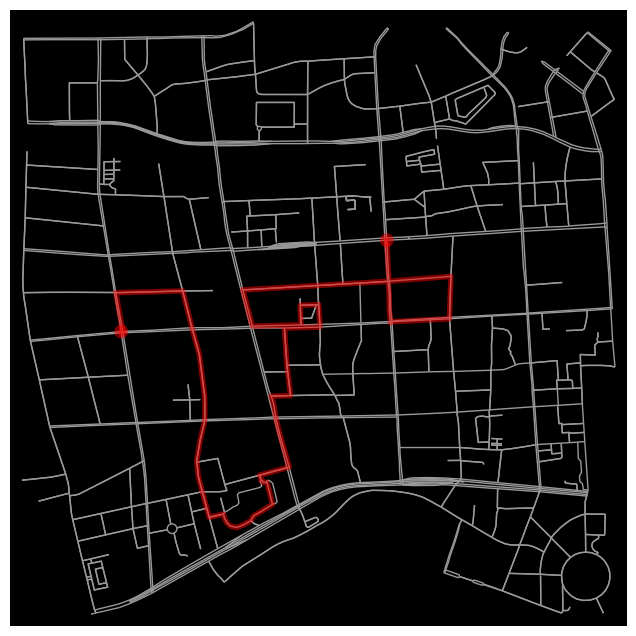

In [8]:

# Specify the start and end nodes
start_node = 332556593
end_node = 262910008

start_time = time.time()


############ built-in function
# # Get the predecessors of each node in the DFS traversal
# dfs_predecessors = nx.dfs_predecessors(graph, source=start_node)

# # Traverse the predecessors to get the route from the start node to the end node
# dfs_route = [end_node]
# while dfs_route[-1] != start_node:
#     dfs_route.append(dfs_predecessors[dfs_route[-1]])
# dfs_route = dfs_route[::-1]  # reverse the route to start from the start node


# ## self-defined function
def dfs(graph, start, end, visited=None, path=None):
    if visited is None:
        visited = set()
    if path is None:
        path = []

    visited.add(start)
    path.append(start)

    if start == end:
        return path

    for neighbor in graph[start]:
        if neighbor not in visited:
            new_path = dfs(graph, neighbor, end, visited, path.copy())
            if new_path:  # If a path is returned, that means we found the target node
                return new_path

    return None

dfs_route = dfs(graph, start_node, end_node)


end_time = time.time()

print(f"Execution time: {end_time - start_time} seconds")

# Plot the route
fig, ax = ox.plot_graph_route(graph, dfs_route, route_linewidth=4, node_size=0, bgcolor='k')

routing.draw_route(graph, dfs_route)


Execution time: 0.00012612342834472656 seconds


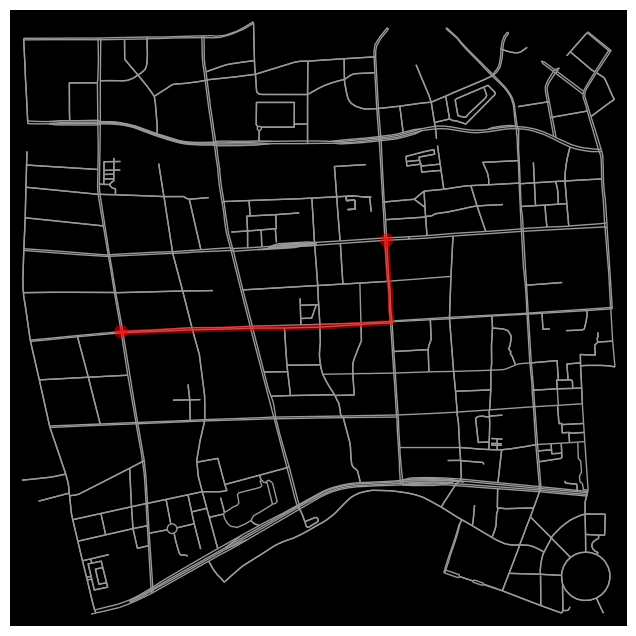

In [9]:
start_time = time.time()

# Find the shortest path using Dijkstra's algorithm
dijkstra_route = nx.shortest_path(graph, source=start_node, target=end_node, method='dijkstra')

end_time = time.time()

print(f"Execution time: {end_time - start_time} seconds")

# Plot the route
fig, ax = ox.plot_graph_route(graph, dijkstra_route, route_linewidth=4, node_size=0, bgcolor='k')

routing.draw_route(graph, dijkstra_route)

In [10]:
import math

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = 6371 * c  # Radius of Earth in kilometers

    return distance

def cal_distance_with_id(osmid_1, osmid_2):

    # Fetch the nodes' data
    node_1 = graph.nodes[osmid_1]
    node_2 = graph.nodes[osmid_2]

    # Extract the coordinates
    lat1, lon1 = node_1['y'], node_1['x']
    lat2, lon2 = node_2['y'], node_2['x']
    distance = haversine_distance(lat1, lon1, lat2, lon2)

    # print(f"Distance between nodes {osmid_1} and {osmid_2}: {distance} km")

    return distance

# e.g. distance between nodes id 332556593 and 332556598, unit of km
cal_distance_with_id(332556593, 332556598)


0.5476831967133818

no annealing
8.478926369803355
1
annealing
no annealing
7.021273054663541
2
annealing
no annealing
6.711377139038535
3
annealing
no annealing
6.202486684890011
4
annealing
no annealing
6.160210338356701
5
annealing
no annealing
6.120962703622275
6
annealing
Execution time: 2.6727190017700195 seconds
6.120962703622275


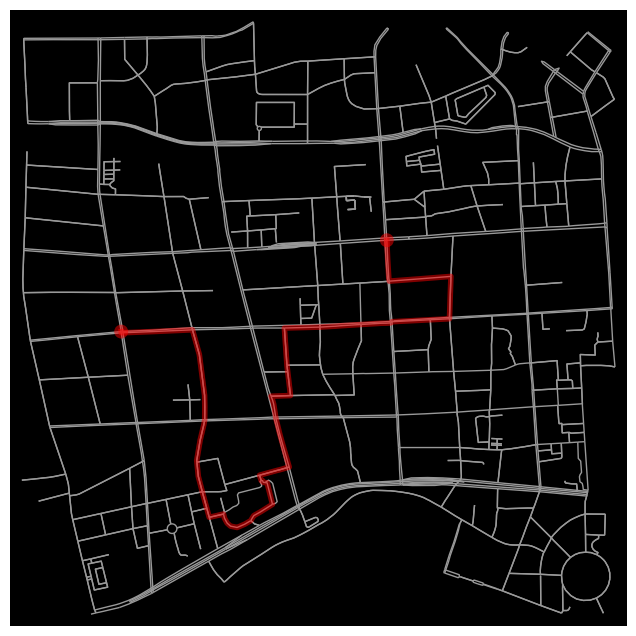

In [11]:

# We set the initial solution to be the route we got from the DFS traversal
route = dfs_route


import random

def cost(route):
    total_cost = 0
    # print(route)
    for u, v in zip(route[:-1], route[1:]):
        try:
            total_cost += cal_distance_with_id(u, v)
        except KeyError:
            # With the current modification, there should be no KeyError.
            with open("error.txt", "a") as f:  # "a" mode appends to the file if it exists
                print(u, v)
                print("Error calculating cost between nodes {u} and {v}.", file=f) 
            return float('inf')
    
    return total_cost

# update function 1 NOT USED
def get_neighbour(route):
    idx1, idx2 = random.sample(range(1, len(route)-1), 2)
    new_route = route[:]
    new_route[idx1], new_route[idx2] = new_route[idx2], new_route[idx1]
    return new_route

# update function 2
def dfs_vibration(route):
    idx1, idx2 = random.sample(range(1, len(route)-1), 2)
    
    start_node = route[idx1 if idx1 < idx2 else idx2]
    end_node = route[idx2 if idx1 < idx2 else idx1]
    
    dfs_route = dfs(graph, start_node, end_node)
    
    route = route[:idx1] + dfs_route + route[idx2+1:]
    
    return route
    

def simulated_annealing(route, T=100, alpha=0.999, stopping_T=0.001):
    current_route = route[:]
    current_cost = cost(current_route)
    best_route = route[:]
    best_cost = current_cost
    i = 0
    while T > stopping_T:
        neighbour = dfs_vibration(current_route)
        neighbour_cost = cost(neighbour)
        
        if neighbour_cost < best_cost:
            print('no annealing')
            best_cost = neighbour_cost
            print(best_cost)
            best_route = neighbour[:] 
            
        if neighbour_cost < current_cost or random.random() < 10000*(current_cost - neighbour_cost):
            i += 1
            print(i)
            print('annealing')
            current_route = neighbour[:]
            current_cost = neighbour_cost
        
        T *= alpha

    return best_route

initial_route = route # dfs_route

start_time = time.time()

optimized_route = simulated_annealing(initial_route)

end_time = time.time()

print(f"Execution time: {end_time - start_time} seconds")


print(cost(optimized_route))
fig, ax = ox.plot_graph_route(graph, optimized_route, route_linewidth=4, node_size=0, bgcolor='k')
